In [2]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu, ttest_ind
from scipy.stats import chi2_contingency

posts = pd.read_csv("covid_instagram.csv")
events = pd.read_csv("events.csv")

posts['Date'] = pd.to_datetime(posts['Date'], format='%m/%d/%Y')
events['start_date'] = pd.to_datetime(events['start_date'])
events['end_date'] = pd.to_datetime(events['end_date'])

## Pfizer vaccine

In [4]:
sentiment_map = {'negative': -1, 'neutral': 0, 'positive': 1}
posts['sentiment_score'] = posts['Sentiment'].map(sentiment_map)

pfizer_row = events[events['event_name']
                    .str.contains("Pfizer", case=False)].iloc[0]
event_date = pfizer_row['start_date']
window_days = 30
pre_start = event_date - pd.Timedelta(days=window_days)
pre_end   = event_date - pd.Timedelta(days=1)
post_start = event_date
post_end   = event_date + pd.Timedelta(days=window_days)

print("Pfizer event date:", event_date.date())
print(f"Pre window:  {pre_start.date()} → {pre_end.date()}")
print(f"Post window: {post_start.date()} → {post_end.date()}")

pre_all = posts[(posts['Date'] >= pre_start) & (posts['Date'] <= pre_end)]
post_all = posts[(posts['Date'] >= post_start) & (posts['Date'] <= post_end)]

pre_scores_all = pre_all['sentiment_score'].dropna()
post_scores_all = post_all['sentiment_score'].dropna()

print("\n=== H1: Vaccine announcement effect (ALL languages) ===")
print(f"N_pre = {len(pre_scores_all)}, N_post = {len(post_scores_all)}")
pre_mean_all = pre_scores_all.mean()
post_mean_all = post_scores_all.mean()
print(f"Mean sentiment pre : {pre_mean_all:.3f}")
print(f"Mean sentiment post: {post_mean_all:.3f}")
mw_stat_all, mw_p_all = mannwhitneyu(pre_scores_all,
                                     post_scores_all,
                                     alternative='two-sided')
tt_stat_all, tt_p_all = ttest_ind(pre_scores_all,
                                  post_scores_all,
                                  equal_var=False)

print(f"Mann–Whitney U p-value: {mw_p_all:.4f}")
print("=> Reject H0 (sentiment changed)"
      if mw_p_all < 0.05 else
      "=> Fail to reject H0 (no significant change)")
print(f"T-test p-value:         {tt_p_all:.4f}")

pos_share_pre_all = (pre_all['Sentiment'] == 'positive').mean()
pos_share_post_all = (post_all['Sentiment'] == 'positive').mean()
print(f"Positive share pre :  {pos_share_pre_all:.3f}")
print(f"Positive share post: {pos_share_post_all:.3f}")

pre_en = pre_all[pre_all['Language Code'] == 'en']
post_en = post_all[post_all['Language Code'] == 'en']

pre_scores_en = pre_en['sentiment_score'].dropna()
post_scores_en = post_en['sentiment_score'].dropna()

print("\n=== H1: Vaccine announcement effect (ENGLISH only) ===")
print(f"N_pre_en = {len(pre_scores_en)}, N_post_en = {len(post_scores_en)}")
pre_mean_en = pre_scores_en.mean()
post_mean_en = post_scores_en.mean()
print(f"Mean sentiment pre (en) : {pre_mean_en:.3f}")
print(f"Mean sentiment post (en): {post_mean_en:.3f}")

mw_stat_en, mw_p_en = mannwhitneyu(pre_scores_en,
                                   post_scores_en,
                                   alternative='two-sided')
tt_stat_en, tt_p_en = ttest_ind(pre_scores_en,
                                post_scores_en,
                                equal_var=False)

print(f"Mann–Whitney U p-value (en): {mw_p_en:.4f}")
print("=> Reject H0 (sentiment changed)"
      if mw_p_en < 0.05 else
      "=> Fail to reject H0 (no significant change)")
print(f"T-test p-value (en):         {tt_p_en:.4f}")

pos_share_pre_en = (pre_en['Sentiment'] == 'positive').mean()
pos_share_post_en = (post_en['Sentiment'] == 'positive').mean()
print(f"Positive share pre (en) :  {pos_share_pre_en:.3f}")
print(f"Positive share post (en): {pos_share_post_en:.3f}")

pre_ta = pre_all[pre_all['Full Language'] == 'Tamil']
post_ta = post_all[post_all['Full Language'] == 'Tamil']

pre_scores_ta = pre_ta['sentiment_score'].dropna()
post_scores_ta = post_ta['sentiment_score'].dropna()

print("\n=== H1: Vaccine announcement effect (TAMIL only) ===")
print(f"N_pre_ta = {len(pre_scores_ta)}, N_post_ta = {len(post_scores_ta)}")
pre_mean_ta = pre_scores_ta.mean()
post_mean_ta = post_scores_ta.mean()
print(f"Mean sentiment pre (ta) : {pre_mean_ta:.3f}")
print(f"Mean sentiment post (ta): {post_mean_ta:.3f}")

if len(pre_scores_ta) > 0 and len(post_scores_ta) > 0:
    mw_stat_ta, mw_p_ta = mannwhitneyu(pre_scores_ta,
                                       post_scores_ta,
                                       alternative='two-sided')
    tt_stat_ta, tt_p_ta = ttest_ind(pre_scores_ta,
                                    post_scores_ta,
                                    equal_var=False)
    print(f"Mann–Whitney U p-value (ta): {mw_p_ta:.4f}")
    print(f"T-test p-value (ta):         {tt_p_ta:.4f}")
else:
    mw_p_ta = np.nan
    print("Not enough Tamil data for statistical test.")

pos_share_pre_ta = (pre_ta['Sentiment'] == 'positive').mean() if len(pre_ta) > 0 else np.nan
pos_share_post_ta = (post_ta['Sentiment'] == 'positive').mean() if len(post_ta) > 0 else np.nan
print(f"Positive share pre (ta) :  {pos_share_pre_ta:.3f}")
print(f"Positive share post (ta): {pos_share_post_ta:.3f}")

pre_hi = pre_all[pre_all['Full Language'] == 'Hindi']
post_hi = post_all[post_all['Full Language'] == 'Hindi']

pre_scores_hi = pre_hi['sentiment_score'].dropna()
post_scores_hi = post_hi['sentiment_score'].dropna()

print("\n=== H1: Vaccine announcement effect (HINDI only) ===")
print(f"N_pre_hi = {len(pre_scores_hi)}, N_post_hi = {len(post_scores_hi)}")
pre_mean_hi = pre_scores_hi.mean()
post_mean_hi = post_scores_hi.mean()
print(f"Mean sentiment pre (hi) : {pre_mean_hi:.3f}")
print(f"Mean sentiment post (hi): {post_mean_hi:.3f}")

if len(pre_scores_hi) > 0 and len(post_scores_hi) > 0:
    mw_stat_hi, mw_p_hi = mannwhitneyu(pre_scores_hi,
                                       post_scores_hi,
                                       alternative='two-sided')
    tt_stat_hi, tt_p_hi = ttest_ind(pre_scores_hi,
                                    post_scores_hi,
                                    equal_var=False)
    print(f"Mann–Whitney U p-value (hi): {mw_p_hi:.4f}")
    print(f"T-test p-value (hi):         {tt_p_hi:.4f}")
else:
    mw_p_hi = np.nan
    print("Not enough Hindi data for statistical test.")

pos_share_pre_hi = (pre_hi['Sentiment'] == 'positive').mean() if len(pre_hi) > 0 else np.nan
pos_share_post_hi = (post_hi['Sentiment'] == 'positive').mean() if len(post_hi) > 0 else np.nan
print(f"Positive share pre (hi) :  {pos_share_pre_hi:.3f}")
print(f"Positive share post (hi): {pos_share_post_hi:.3f}")

direction_all = "increased" if post_mean_all > pre_mean_all else "decreased"
direction_en = "increased" if post_mean_en > pre_mean_en else "decreased"
direction_ta = "increased" if post_mean_ta > pre_mean_ta else "decreased"
direction_hi = "increased" if post_mean_hi > pre_mean_hi else "decreased"

print("\n=== H1 SUMMARY ===")
if mw_p_all < 0.05:
    print(f"All languages: sentiment {direction_all} after the Pfizer announcement "
          f"({pre_mean_all:.3f} → {post_mean_all:.3f}, p = {mw_p_all:.4f}).")
else:
    print("All languages: no statistically significant sentiment change after Pfizer.")

if mw_p_en < 0.05:
    print(f"English only: sentiment {direction_en} after the Pfizer announcement "
          f"({pre_mean_en:.3f} → {post_mean_en:.3f}, p = {mw_p_en:.4f}).")
else:
    print("English only: no statistically significant sentiment change after Pfizer.")

if not np.isnan(pre_mean_ta) and not np.isnan(post_mean_ta):
    if not np.isnan(mw_p_ta) and mw_p_ta < 0.05:
        print(f"Tamil only: sentiment {direction_ta} after the Pfizer announcement "
              f"({pre_mean_ta:.3f} → {post_mean_ta:.3f}, p = {mw_p_ta:.4f}).")
    else:
        print("Tamil only: no statistically significant sentiment change after Pfizer or insufficient data.")

if not np.isnan(pre_mean_hi) and not np.isnan(post_mean_hi):
    if not np.isnan(mw_p_hi) and mw_p_hi < 0.05:
        print(f"Hindi only: sentiment {direction_hi} after the Pfizer announcement "
              f"({pre_mean_hi:.3f} → {post_mean_hi:.3f}, p = {mw_p_hi:.4f}).")
    else:
        print("Hindi only: no statistically significant sentiment change after Pfizer or insufficient data.")


Pfizer event date: 2020-12-11
Pre window:  2020-11-11 → 2020-12-10
Post window: 2020-12-11 → 2021-01-10

=== H1: Vaccine announcement effect (ALL languages) ===
N_pre = 5135, N_post = 7282
Mean sentiment pre : 0.205
Mean sentiment post: 0.175
Mann–Whitney U p-value: 0.0355
=> Reject H0 (sentiment changed)
T-test p-value:         0.0191
Positive share pre :  0.373
Positive share post: 0.366

=== H1: Vaccine announcement effect (ENGLISH only) ===
N_pre_en = 3805, N_post_en = 5637
Mean sentiment pre (en) : 0.339
Mean sentiment post (en): 0.281
Mann–Whitney U p-value (en): 0.0002
=> Reject H0 (sentiment changed)
T-test p-value (en):         0.0001
Positive share pre (en) :  0.483
Positive share post (en): 0.448

=== H1: Vaccine announcement effect (TAMIL only) ===
N_pre_ta = 244, N_post_ta = 229
Mean sentiment pre (ta) : -0.061
Mean sentiment post (ta): -0.048
Mann–Whitney U p-value (ta): 0.5226
T-test p-value (ta):         0.5210
Positive share pre (ta) :  0.000
Positive share post (ta): 

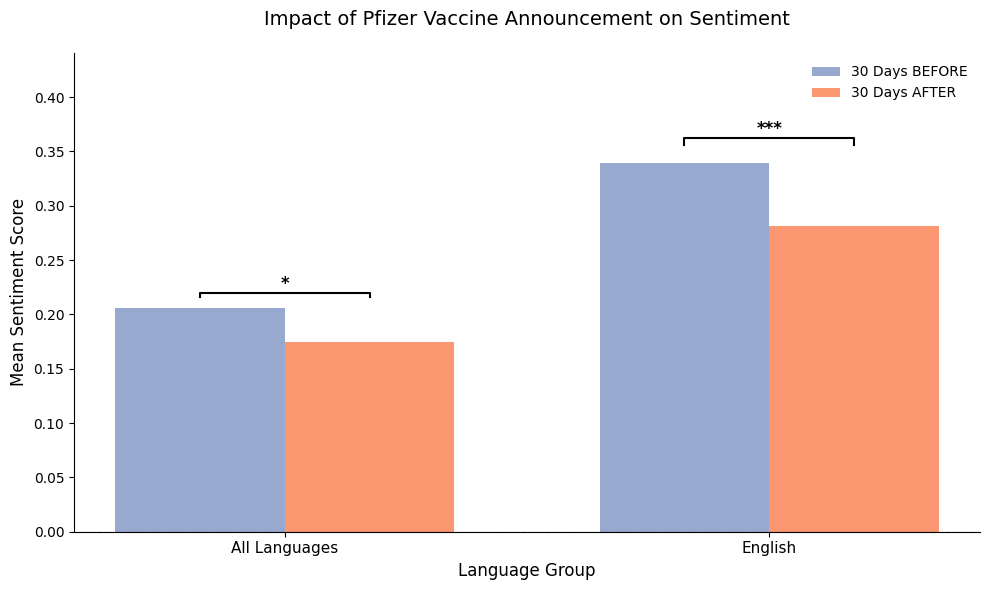

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
data_summary = [
    {
        "Group": "All Languages",
        "Pre": pre_mean_all,
        "Post": post_mean_all,
        "P_val": mw_p_all
    },
    {
        "Group": "English",
        "Pre": pre_mean_en,
        "Post": post_mean_en,
        "P_val": mw_p_en
    }
]
plot_data = [d for d in data_summary if not (np.isnan(d['Pre']) or np.isnan(d['Post']))]
groups = [d['Group'] for d in plot_data]
pre_means = [d['Pre'] for d in plot_data]
post_means = [d['Post'] for d in plot_data]
p_values = [d['P_val'] for d in plot_data]
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(groups))
color_pre = '#8da0cb' 
color_post = '#fc8d62'
rects1 = plt.bar(index, pre_means, bar_width, label='30 Days BEFORE', color=color_pre, alpha=0.9)
rects2 = plt.bar(index + bar_width, post_means, bar_width, label='30 Days AFTER', color=color_post, alpha=0.9)
def label_significance(i, p, rects1, rects2):
    """Малює дужку та зірочки, якщо p-value < 0.05"""
    if np.isnan(p): return
    h1 = rects1[i].get_height()
    h2 = rects2[i].get_height()
    max_h = max(h1, h2)
    x1 = rects1[i].get_x() + rects1[i].get_width() / 2
    x2 = rects2[i].get_x() + rects2[i].get_width() / 2
    bar_top = max_h + (max_h * 0.05)
    h_bracket = max_h * 0.02
    if p < 0.001:
        sig_symbol = "***"
    elif p < 0.01:
        sig_symbol = "**"
    elif p < 0.05:
        sig_symbol = "*"
    else:
        sig_symbol = "ns"
    if sig_symbol != "ns":
        plt.plot([x1, x1, x2, x2], [bar_top, bar_top + h_bracket, bar_top + h_bracket, bar_top], lw=1.5, c='k')
        plt.text((x1 + x2) * .5, bar_top + h_bracket, sig_symbol, ha='center', va='bottom', color='k', fontsize=12, fontweight='bold')
    else:
        plt.text((x1 + x2) * .5, max_h + (max_h * 0.02), "ns", ha='center', va='bottom', color='grey', fontsize=10, style='italic')

for i, p in enumerate(p_values):
    label_significance(i, p, rects1, rects2)
plt.xlabel('Language Group', fontsize=12)
plt.ylabel('Mean Sentiment Score', fontsize=12)
plt.title('Impact of Pfizer Vaccine Announcement on Sentiment', fontsize=14, pad=20)
plt.xticks(index + bar_width / 2, groups, fontsize=11)
plt.legend(loc='best', frameon=False)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylim(0, max(max(pre_means), max(post_means)) * 1.3)

plt.tight_layout()
plt.savefig('pfizer_impact_chart.png', transparent=True, dpi=300)
plt.show()

## Oxford–AstraZeneca

In [20]:

az_row = events[events['event_name']
                .str.contains("Oxford–AstraZeneca", case=False)].iloc[0]

event_date = az_row['start_date']
window_days = 30
pre_start = event_date - pd.Timedelta(days=window_days)
pre_end   = event_date - pd.Timedelta(days=1)

post_start = event_date
post_end   = event_date + pd.Timedelta(days=window_days)

print("Oxford–AstraZeneca event date:", event_date.date())
print(f"Pre window:  {pre_start.date()} → {pre_end.date()}")
print(f"Post window: {post_start.date()} → {post_end.date()}")

pre_all = posts[(posts['Date'] >= pre_start) & (posts['Date'] <= pre_end)]
post_all = posts[(posts['Date'] >= post_start) & (posts['Date'] <= post_end)]

pre_scores_all = pre_all['sentiment_score'].dropna()
post_scores_all = post_all['sentiment_score'].dropna()

print("\n=== H1: Vaccine announcement effect (ALL languages) ===")
print(f"N_pre = {len(pre_scores_all)}, N_post = {len(post_scores_all)}")
pre_mean_all = pre_scores_all.mean()
post_mean_all = post_scores_all.mean()
print(f"Mean sentiment pre : {pre_mean_all:.3f}")
print(f"Mean sentiment post: {post_mean_all:.3f}")

mw_stat_all, mw_p_all = mannwhitneyu(pre_scores_all,
                                     post_scores_all,
                                     alternative='two-sided')
tt_stat_all, tt_p_all = ttest_ind(pre_scores_all,
                                  post_scores_all,
                                  equal_var=False)

print(f"Mann–Whitney U p-value: {mw_p_all:.4f}")
print(f"T-test p-value:         {tt_p_all:.4f}")

pos_share_pre_all = (pre_all['Sentiment'] == 'positive').mean()
pos_share_post_all = (post_all['Sentiment'] == 'positive').mean()
print(f"Positive share pre :  {pos_share_pre_all:.3f}")
print(f"Positive share post: {pos_share_post_all:.3f}")

pre_en = pre_all[pre_all['Language Code'] == 'en']
post_en = post_all[post_all['Language Code'] == 'en']

pre_scores_en = pre_en['sentiment_score'].dropna()
post_scores_en = post_en['sentiment_score'].dropna()

print("\n=== H1: Vaccine announcement effect (ENGLISH only) ===")
print(f"N_pre_en = {len(pre_scores_en)}, N_post_en = {len(post_scores_en)}")
pre_mean_en = pre_scores_en.mean()
post_mean_en = post_scores_en.mean()
print(f"Mean sentiment pre (en) : {pre_mean_en:.3f}")
print(f"Mean sentiment post (en): {post_mean_en:.3f}")

mw_stat_en, mw_p_en = mannwhitneyu(pre_scores_en,
                                   post_scores_en,
                                   alternative='two-sided')
tt_stat_en, tt_p_en = ttest_ind(pre_scores_en,
                                post_scores_en,
                                equal_var=False)

print(f"Mann–Whitney U p-value (en): {mw_p_en:.4f}")
print(f"T-test p-value (en):         {tt_p_en:.4f}")

pos_share_pre_en = (pre_en['Sentiment'] == 'positive').mean()
pos_share_post_en = (post_en['Sentiment'] == 'positive').mean()
print(f"Positive share pre (en) :  {pos_share_pre_en:.3f}")
print(f"Positive share post (en): {pos_share_post_en:.3f}")

pre_ta = pre_all[pre_all['Full Language'] == 'Tamil']
post_ta = post_all[post_all['Full Language'] == 'Tamil']

pre_scores_ta = pre_ta['sentiment_score'].dropna()
post_scores_ta = post_ta['sentiment_score'].dropna()

print("\n=== H1: Vaccine announcement effect (TAMIL only) ===")
print(f"N_pre_ta = {len(pre_scores_ta)}, N_post_ta = {len(post_scores_ta)}")
pre_mean_ta = pre_scores_ta.mean() if len(pre_scores_ta) > 0 else np.nan
post_mean_ta = post_scores_ta.mean() if len(post_scores_ta) > 0 else np.nan
print(f"Mean sentiment pre (ta) : {pre_mean_ta:.3f}")
print(f"Mean sentiment post (ta): {post_mean_ta:.3f}")

if len(pre_scores_ta) > 0 and len(post_scores_ta) > 0:
    mw_stat_ta, mw_p_ta = mannwhitneyu(pre_scores_ta,
                                       post_scores_ta,
                                       alternative='two-sided')
    tt_stat_ta, tt_p_ta = ttest_ind(pre_scores_ta,
                                    post_scores_ta,
                                    equal_var=False)
    print(f"Mann–Whitney U p-value (ta): {mw_p_ta:.4f}")
    print(f"T-test p-value (ta):         {tt_p_ta:.4f}")
else:
    mw_p_ta = np.nan
    print("Not enough Tamil data for statistical test.")

pos_share_pre_ta = (pre_ta['Sentiment'] == 'positive').mean() if len(pre_ta) > 0 else np.nan
pos_share_post_ta = (post_ta['Sentiment'] == 'positive').mean() if len(post_ta) > 0 else np.nan
print(f"Positive share pre (ta) :  {pos_share_pre_ta:.3f}")
print(f"Positive share post (ta): {pos_share_post_ta:.3f}")

pre_hi = pre_all[pre_all['Full Language'] == 'Hindi']
post_hi = post_all[post_all['Full Language'] == 'Hindi']

pre_scores_hi = pre_hi['sentiment_score'].dropna()
post_scores_hi = post_hi['sentiment_score'].dropna()

print("\n=== H1: Vaccine announcement effect (HINDI only) ===")
print(f"N_pre_hi = {len(pre_scores_hi)}, N_post_hi = {len(post_scores_hi)}")
pre_mean_hi = pre_scores_hi.mean() if len(pre_scores_hi) > 0 else np.nan
post_mean_hi = post_scores_hi.mean() if len(post_scores_hi) > 0 else np.nan
print(f"Mean sentiment pre (hi) : {pre_mean_hi:.3f}")
print(f"Mean sentiment post (hi): {post_mean_hi:.3f}")

if len(pre_scores_hi) > 0 and len(post_scores_hi) > 0:
    mw_stat_hi, mw_p_hi = mannwhitneyu(pre_scores_hi,
                                       post_scores_hi,
                                       alternative='two-sided')
    tt_stat_hi, tt_p_hi = ttest_ind(pre_scores_hi,
                                    post_scores_hi,
                                    equal_var=False)
    print(f"Mann–Whitney U p-value (hi): {mw_p_hi:.4f}")
    print(f"T-test p-value (hi):         {tt_p_hi:.4f}")
else:
    mw_p_hi = np.nan
    print("Not enough Hindi data for statistical test.")

pos_share_pre_hi = (pre_hi['Sentiment'] == 'positive').mean() if len(pre_hi) > 0 else np.nan
pos_share_post_hi = (post_hi['Sentiment'] == 'positive').mean() if len(post_hi) > 0 else np.nan
print(f"Positive share pre (hi) :  {pos_share_pre_hi:.3f}")
print(f"Positive share post (hi): {pos_share_post_hi:.3f}")

direction_all = "increased" if post_mean_all > pre_mean_all else "decreased"
direction_en = "increased" if post_mean_en > pre_mean_en else "decreased"
direction_ta = "increased" if post_mean_ta > pre_mean_ta else "decreased"
direction_hi = "increased" if post_mean_hi > pre_mean_hi else "decreased"

print("\n=== H1 SUMMARY (Oxford–AstraZeneca) ===")
if mw_p_all < 0.05:
    print(f"All languages: sentiment {direction_all} after the Oxford–AstraZeneca announcement "
          f"({pre_mean_all:.3f} → {post_mean_all:.3f}, p = {mw_p_all:.4f}).")
else:
    print("All languages: no statistically significant sentiment change after Oxford–AstraZeneca.")

if mw_p_en < 0.05:
    print(f"English only: sentiment {direction_en} after the Oxford–AstraZeneca announcement "
          f"({pre_mean_en:.3f} → {post_mean_en:.3f}, p = {mw_p_en:.4f}).")
else:
    print("English only: no statistically significant sentiment change after Oxford–AstraZeneca.")

if not np.isnan(pre_mean_ta) and not np.isnan(post_mean_ta):
    if not np.isnan(mw_p_ta) and mw_p_ta < 0.05:
        print(f"Tamil only: sentiment {direction_ta} after the Oxford–AstraZeneca announcement "
              f"({pre_mean_ta:.3f} → {post_mean_ta:.3f}, p = {mw_p_ta:.4f}).")
    else:
        print("Tamil only: no statistically significant sentiment change after Oxford–AstraZeneca or insufficient data.")

if not np.isnan(pre_mean_hi) and not np.isnan(post_mean_hi):
    if not np.isnan(mw_p_hi) and mw_p_hi < 0.05:
        print(f"Hindi only: sentiment {direction_hi} after the Oxford–AstraZeneca announcement "
              f"({pre_mean_hi:.3f} → {post_mean_hi:.3f}, p = {mw_p_hi:.4f}).")
    else:
        print("Hindi only: no statistically significant sentiment change after Oxford–AstraZeneca or insufficient data.")


Oxford–AstraZeneca event date: 2020-12-30
Pre window:  2020-11-30 → 2020-12-29
Post window: 2020-12-30 → 2021-01-29

=== H1: Vaccine announcement effect (ALL languages) ===
N_pre = 6880, N_post = 6906
Mean sentiment pre : 0.197
Mean sentiment post: 0.164
Mann–Whitney U p-value: 0.0136
T-test p-value:         0.0069
Positive share pre :  0.375
Positive share post: 0.367

=== H1: Vaccine announcement effect (ENGLISH only) ===
N_pre_en = 5385, N_post_en = 5230
Mean sentiment pre (en) : 0.303
Mean sentiment post (en): 0.278
Mann–Whitney U p-value (en): 0.1871
T-test p-value (en):         0.0881
Positive share pre (en) :  0.457
Positive share post (en): 0.456

=== H1: Vaccine announcement effect (TAMIL only) ===
N_pre_ta = 219, N_post_ta = 273
Mean sentiment pre (ta) : -0.073
Mean sentiment post (ta): -0.033
Mann–Whitney U p-value (ta): 0.0543
T-test p-value (ta):         0.0608
Positive share pre (ta) :  0.000
Positive share post (ta): 0.004

=== H1: Vaccine announcement effect (HINDI only

Подія: Oxford–AstraZeneca (2020-12-30)
All Languages: 0.197 -> 0.164 (p=0.0136)
English:       0.303 -> 0.278 (p=0.1871)


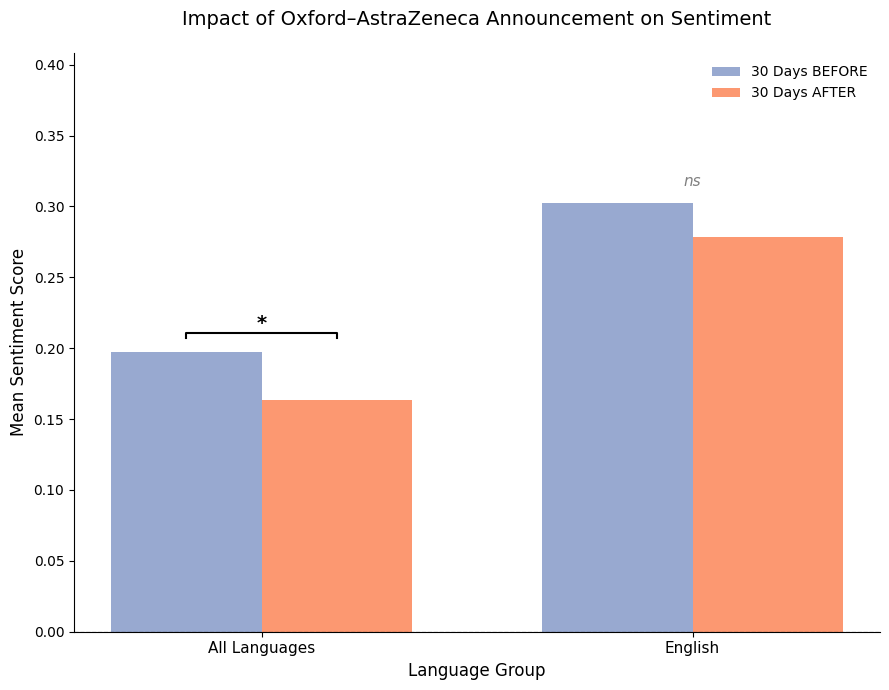

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import mannwhitneyu

# ==========================================
# 1. ОТРИМАННЯ ДАНИХ (Oxford–AstraZeneca)
# ==========================================

# 1.1 Знаходимо подію
az_row = events[events['event_name']
                .str.contains("Oxford–AstraZeneca", case=False)].iloc[0]
event_date = az_row['start_date']

# 1.2 Встановлюємо вікно 30 днів
window_days = 30
pre_start = event_date - pd.Timedelta(days=window_days)
pre_end   = event_date - pd.Timedelta(days=1)
post_start = event_date
post_end   = event_date + pd.Timedelta(days=window_days)

print(f"Подія: Oxford–AstraZeneca ({event_date.date()})")

# 1.3 Фільтруємо дані за цей період
pre_all = posts[(posts['Date'] >= pre_start) & (posts['Date'] <= pre_end)]
post_all = posts[(posts['Date'] >= post_start) & (posts['Date'] <= post_end)]

# ==========================================
# 2. РОЗРАХУНОК СТАТИСТИКИ
# ==========================================

# --- Група 1: All Languages ---
pre_scores_all = pre_all['sentiment_score'].dropna()
post_scores_all = post_all['sentiment_score'].dropna()

pre_mean_all = pre_scores_all.mean()
post_mean_all = post_scores_all.mean()
mw_stat_all, mw_p_all = mannwhitneyu(pre_scores_all, post_scores_all, alternative='two-sided')

# --- Група 2: English Only ---
pre_en = pre_all[pre_all['Language Code'] == 'en']
post_en = post_all[post_all['Language Code'] == 'en']

pre_scores_en = pre_en['sentiment_score'].dropna()
post_scores_en = post_en['sentiment_score'].dropna()

pre_mean_en = pre_scores_en.mean()
post_mean_en = post_scores_en.mean()
mw_stat_en, mw_p_en = mannwhitneyu(pre_scores_en, post_scores_en, alternative='two-sided')

print(f"All Languages: {pre_mean_all:.3f} -> {post_mean_all:.3f} (p={mw_p_all:.4f})")
print(f"English:       {pre_mean_en:.3f} -> {post_mean_en:.3f} (p={mw_p_en:.4f})")

# ==========================================
# 3. ПОБУДОВА ГРАФІКА
# ==========================================

# Формуємо дані для візуалізації
data_summary = [
    {
        "Group": "All Languages",
        "Pre": pre_mean_all,
        "Post": post_mean_all,
        "P_val": mw_p_all
    },
    {
        "Group": "English",
        "Pre": pre_mean_en,
        "Post": post_mean_en,
        "P_val": mw_p_en
    }
]

groups = [d['Group'] for d in data_summary]
pre_means = [d['Pre'] for d in data_summary]
post_means = [d['Post'] for d in data_summary]
p_values = [d['P_val'] for d in data_summary]

plt.figure(figsize=(9, 7))
bar_width = 0.35
index = np.arange(len(groups))

# Кольори
color_pre = '#8da0cb'
color_post = '#fc8d62'

rects1 = plt.bar(index, pre_means, bar_width, label='30 Days BEFORE', color=color_pre, alpha=0.9)
rects2 = plt.bar(index + bar_width, post_means, bar_width, label='30 Days AFTER', color=color_post, alpha=0.9)

# Функція анотацій
def label_significance(i, p, rects1, rects2):
    if np.isnan(p): return
    
    h1 = rects1[i].get_height()
    h2 = rects2[i].get_height()
    max_h = max(h1, h2)
    
    x1 = rects1[i].get_x() + rects1[i].get_width() / 2
    x2 = rects2[i].get_x() + rects2[i].get_width() / 2
    bar_top = max_h + (max_h * 0.05)
    h_bracket = max_h * 0.02

    # Визначення символу
    if p < 0.001:
        sig_symbol = "***"
        font_w = 'bold'
        f_size = 14
    elif p < 0.01:
        sig_symbol = "**"
        font_w = 'bold'
        f_size = 14
    elif p < 0.05:
        sig_symbol = "*"
        font_w = 'bold'
        f_size = 14
    else:
        sig_symbol = "ns" # not significant
        font_w = 'normal' # звичайний шрифт для ns
        f_size = 11

    # Малюємо дужку і текст
    # Для AstraZeneca важливо показати 'ns', якщо змін немає
    if sig_symbol != "ns":
        plt.plot([x1, x1, x2, x2], [bar_top, bar_top + h_bracket, bar_top + h_bracket, bar_top], lw=1.5, c='k')
        plt.text((x1 + x2) * .5, bar_top + h_bracket, sig_symbol, ha='center', va='bottom', color='k', fontsize=f_size, fontweight=font_w)
    else:
        # Для ns просто текст, трохи вище
        plt.text((x1 + x2) * .5, max_h + 0.01, "ns", ha='center', va='bottom', color='grey', fontsize=f_size, style='italic')

# Додаємо анотації
for i, p in enumerate(p_values):
    label_significance(i, p, rects1, rects2)

plt.xlabel('Language Group', fontsize=12)
plt.ylabel('Mean Sentiment Score', fontsize=12)
plt.title('Impact of Oxford–AstraZeneca Announcement on Sentiment', fontsize=14, pad=20)
plt.xticks(index + bar_width / 2, groups, fontsize=11)
plt.legend(loc='best', frameon=False)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylim(0, max(max(pre_means), max(post_means)) * 1.35)

plt.tight_layout()
plt.savefig('astrazeneca_impact_chart_fixed.png', transparent=True, dpi=300)
plt.show()

## End of global health emergency

In [ ]:
row_end = events[events['event_name']
                 .str.contains("end of global health emergency", case=False)].iloc[0]

event_date = row_end['start_date']
window_days = 30
pre_start = event_date - pd.Timedelta(days=window_days)
pre_end   = event_date - pd.Timedelta(days=1)
post_start = event_date
post_end   = event_date + pd.Timedelta(days=window_days)

print("WHO end-of-emergency event date:", event_date.date())
print(f"Pre window:  {pre_start.date()} → {pre_end.date()}")
print(f"Post window: {post_start.date()} → {post_end.date()}")

pre_all = posts[(posts['Date'] >= pre_start) & (posts['Date'] <= pre_end)]
post_all = posts[(posts['Date'] >= post_start) & (posts['Date'] <= post_end)]

pre_scores_all = pre_all['sentiment_score'].dropna()
post_scores_all = post_all['sentiment_score'].dropna()

print("\n=== H: End of emergency effect (ALL languages) ===")
print(f"N_pre = {len(pre_scores_all)}, N_post = {len(post_scores_all)}")
pre_mean_all = pre_scores_all.mean()
post_mean_all = post_scores_all.mean()
print(f"Mean sentiment pre : {pre_mean_all:.3f}")
print(f"Mean sentiment post: {post_mean_all:.3f}")

mw_stat_all, mw_p_all = mannwhitneyu(pre_scores_all,
                                     post_scores_all,
                                     alternative='two-sided')
tt_stat_all, tt_p_all = ttest_ind(pre_scores_all,
                                  post_scores_all,
                                  equal_var=False)

print(f"Mann–Whitney U p-value: {mw_p_all:.4f}")
print(f"T-test p-value:         {tt_p_all:.4f}")

pre_en = pre_all[pre_all['Language Code'] == 'en']
post_en = post_all[post_all['Language Code'] == 'en']

pre_scores_en = pre_en['sentiment_score'].dropna()
post_scores_en = post_en['sentiment_score'].dropna()

print("\n=== H: End of emergency effect (ENGLISH only) ===")
print(f"N_pre_en = {len(pre_scores_en)}, N_post_en = {len(post_scores_en)}")
pre_mean_en = pre_scores_en.mean()
post_mean_en = post_scores_en.mean()
print(f"Mean sentiment pre (en) : {pre_mean_en:.3f}")
print(f"Mean sentiment post (en): {post_mean_en:.3f}")

mw_stat_en, mw_p_en = mannwhitneyu(pre_scores_en,
                                   post_scores_en,
                                   alternative='two-sided')
tt_stat_en, tt_p_en = ttest_ind(pre_scores_en,
                                post_scores_en,
                                equal_var=False)

print(f"Mann–Whitney U p-value (en): {mw_p_en:.4f}")
print(f"T-test p-value (en):         {tt_p_en:.4f}")

pre_ta = pre_all[pre_all['Full Language'] == 'Tamil']
post_ta = post_all[post_all['Full Language'] == 'Tamil']

pre_scores_ta = pre_ta['sentiment_score'].dropna()
post_scores_ta = post_ta['sentiment_score'].dropna()

print("\n=== H: End of emergency effect (TAMIL only) ===")
print(f"N_pre_ta = {len(pre_scores_ta)}, N_post_ta = {len(post_scores_ta)}")
pre_mean_ta = pre_scores_ta.mean() if len(pre_scores_ta) > 0 else np.nan
post_mean_ta = post_scores_ta.mean() if len(post_scores_ta) > 0 else np.nan
print(f"Mean sentiment pre (ta) : {pre_mean_ta:.3f}")
print(f"Mean sentiment post (ta): {post_mean_ta:.3f}")

if len(pre_scores_ta) > 0 and len(post_scores_ta) > 0:
    mw_stat_ta, mw_p_ta = mannwhitneyu(pre_scores_ta,
                                       post_scores_ta,
                                       alternative='two-sided')
    tt_stat_ta, tt_p_ta = ttest_ind(pre_scores_ta,
                                    post_scores_ta,
                                    equal_var=False)
    print(f"Mann–Whitney U p-value (ta): {mw_p_ta:.4f}")
    print(f"T-test p-value (ta):         {tt_p_ta:.4f}")
else:
    mw_p_ta = np.nan
    print("Not enough Tamil data for statistical test.")

pos_share_pre_ta = (pre_ta['Sentiment'] == 'positive').mean() if len(pre_ta) > 0 else np.nan
pos_share_post_ta = (post_ta['Sentiment'] == 'positive').mean() if len(post_ta) > 0 else np.nan
print(f"Positive share pre (ta) :  {pos_share_pre_ta:.3f}")
print(f"Positive share post (ta): {pos_share_post_ta:.3f}")

pre_hi = pre_all[pre_all['Full Language'] == 'Hindi']
post_hi = post_all[post_all['Full Language'] == 'Hindi']

pre_scores_hi = pre_hi['sentiment_score'].dropna()
post_scores_hi = post_hi['sentiment_score'].dropna()

print("\n=== H: End of emergency effect (HINDI only) ===")
print(f"N_pre_hi = {len(pre_scores_hi)}, N_post_hi = {len(post_scores_hi)}")
pre_mean_hi = pre_scores_hi.mean() if len(pre_scores_hi) > 0 else np.nan
post_mean_hi = post_scores_hi.mean() if len(post_scores_hi) > 0 else np.nan
print(f"Mean sentiment pre (hi) : {pre_mean_hi:.3f}")
print(f"Mean sentiment post (hi): {post_mean_hi:.3f}")

if len(pre_scores_hi) > 0 and len(post_scores_hi) > 0:
    mw_stat_hi, mw_p_hi = mannwhitneyu(pre_scores_hi,
                                       post_scores_hi,
                                       alternative='two-sided')
    tt_stat_hi, tt_p_hi = ttest_ind(pre_scores_hi,
                                    post_scores_hi,
                                    equal_var=False)
    print(f"Mann–Whitney U p-value (hi): {mw_p_hi:.4f}")
    print(f"T-test p-value (hi):         {tt_p_hi:.4f}")
else:
    mw_p_hi = np.nan
    print("Not enough Hindi data for statistical test.")

pos_share_pre_hi = (pre_hi['Sentiment'] == 'positive').mean() if len(pre_hi) > 0 else np.nan
pos_share_post_hi = (post_hi['Sentiment'] == 'positive').mean() if len(post_hi) > 0 else np.nan
print(f"Positive share pre (hi) :  {pos_share_pre_hi:.3f}")
print(f"Positive share post (hi): {pos_share_post_hi:.3f}")

direction_all = "increased" if post_mean_all > pre_mean_all else "decreased"
direction_en = "increased" if post_mean_en > pre_mean_en else "decreased"
direction_ta = "increased" if post_mean_ta > pre_mean_ta else "decreased"
direction_hi = "increased" if post_mean_hi > pre_mean_hi else "decreased"

print("\n=== SUMMARY: WHO end of global health emergency ===")
if mw_p_all < 0.05:
    print(f"All languages: sentiment {direction_all} after WHO ended the global health emergency "
          f"({pre_mean_all:.3f} → {post_mean_all:.3f}, p = {mw_p_all:.4f}).")
else:
    print("All languages: no statistically significant sentiment change after WHO ended the global health emergency.")

if mw_p_en < 0.05:
    print(f"English only: sentiment {direction_en} after WHO ended the global health emergency "
          f"({pre_mean_en:.3f} → {post_mean_en:.3f}, p = {mw_p_en:.4f}).")
else:
    print("English only: no statistically significant sentiment change (EN) after WHO ended the global health emergency.")

if not np.isnan(pre_mean_ta) and not np.isnan(post_mean_ta):
    if not np.isnan(mw_p_ta) and mw_p_ta < 0.05:
        print(f"Tamil only: sentiment {direction_ta} after WHO ended the global health emergency "
              f"({pre_mean_ta:.3f} → {post_mean_ta:.3f}, p = {mw_p_ta:.4f}).")
    else:
        print("Tamil only: no statistically significant sentiment change after WHO ended the global health emergency or insufficient data.")

if not np.isnan(pre_mean_hi) and not np.isnan(post_mean_hi):
    if not np.isnan(mw_p_hi) and mw_p_hi < 0.05:
        print(f"Hindi only: sentiment {direction_hi} after WHO ended the global health emergency "
              f"({pre_mean_hi:.3f} → {post_mean_hi:.3f}, p = {mw_p_hi:.4f}).")
    else:
        print("Hindi only: no statistically significant sentiment change after WHO ended the global health emergency or insufficient data.")


WHO end-of-emergency event date: 2023-05-05
Pre window:  2023-04-05 → 2023-05-04
Post window: 2023-05-05 → 2023-06-04

=== H: End of emergency effect (ALL languages) ===
N_pre = 2883, N_post = 2285
Mean sentiment pre : 0.306
Mean sentiment post: 0.355
Mann–Whitney U p-value: 0.0649
T-test p-value:         0.0224

=== H: End of emergency effect (ENGLISH only) ===
N_pre_en = 2299, N_post_en = 1908
Mean sentiment pre (en) : 0.456
Mean sentiment post (en): 0.467
Mann–Whitney U p-value (en): 0.7901
T-test p-value (en):         0.6331

=== H: End of emergency effect (TAMIL only) ===
N_pre_ta = 38, N_post_ta = 9
Mean sentiment pre (ta) : -0.132
Mean sentiment post (ta): -0.222
Mann–Whitney U p-value (ta): 0.5108
T-test p-value (ta):         0.5763
Positive share pre (ta) :  0.000
Positive share post (ta): 0.000

=== H: End of emergency effect (HINDI only) ===
N_pre_hi = 192, N_post_hi = 45
Mean sentiment pre (hi) : -0.672
Mean sentiment post (hi): -0.956
Mann–Whitney U p-value (hi): 0.0002
T-

## WHO declares COVID-19 a pandemic

In [ ]:
row_pandemic = events[events['event_name']
                      .str.contains("declares COVID-19 a pandemic", case=False)].iloc[0]

event_date = row_pandemic['start_date']
window_days = 30
pre_start = event_date - pd.Timedelta(days=window_days)
pre_end   = event_date - pd.Timedelta(days=1)
post_start = event_date
post_end   = event_date + pd.Timedelta(days=window_days)

print("WHO pandemic declaration date:", event_date.date())
print(f"Pre window:  {pre_start.date()} → {pre_end.date()}")
print(f"Post window: {post_start.date()} → {post_end.date()}")

pre_all = posts[(posts['Date'] >= pre_start) & (posts['Date'] <= pre_end)]
post_all = posts[(posts['Date'] >= post_start) & (posts['Date'] <= post_end)]

pre_scores_all = pre_all['sentiment_score'].dropna()
post_scores_all = post_all['sentiment_score'].dropna()

print("\n=== H: Pandemic declaration effect (ALL languages) ===")
print(f"N_pre = {len(pre_scores_all)}, N_post = {len(post_scores_all)}")
pre_mean_all = pre_scores_all.mean()
post_mean_all = post_scores_all.mean()
print(f"Mean sentiment pre : {pre_mean_all:.3f}")
print(f"Mean sentiment post: {post_mean_all:.3f}")

mw_stat_all, mw_p_all = mannwhitneyu(pre_scores_all,
                                     post_scores_all,
                                     alternative='two-sided')
tt_stat_all, tt_p_all = ttest_ind(pre_scores_all,
                                  post_scores_all,
                                  equal_var=False)

print(f"Mann–Whitney U p-value: {mw_p_all:.4f}")
print(f"T-test p-value:         {tt_p_all:.4f}")

pre_en = pre_all[pre_all['Language Code'] == 'en']
post_en = post_all[post_all['Language Code'] == 'en']

pre_scores_en = pre_en['sentiment_score'].dropna()
post_scores_en = post_en['sentiment_score'].dropna()

print("\n=== H: Pandemic declaration effect (ENGLISH only) ===")
print(f"N_pre_en = {len(pre_scores_en)}, N_post_en = {len(post_scores_en)}")
pre_mean_en = pre_scores_en.mean()
post_mean_en = post_scores_en.mean()
print(f"Mean sentiment pre (en) : {pre_mean_en:.3f}")
print(f"Mean sentiment post (en): {post_mean_en:.3f}")

mw_stat_en, mw_p_en = mannwhitneyu(pre_scores_en,
                                   post_scores_en,
                                   alternative='two-sided')
tt_stat_en, tt_p_en = ttest_ind(pre_scores_en,
                                post_scores_en,
                                equal_var=False)

print(f"Mann–Whitney U p-value (en): {mw_p_en:.4f}")
print(f"T-test p-value (en):         {tt_p_en:.4f}")

pre_ta = pre_all[pre_all['Full Language'] == 'Tamil']
post_ta = post_all[post_all['Full Language'] == 'Tamil']

pre_scores_ta = pre_ta['sentiment_score'].dropna()
post_scores_ta = post_ta['sentiment_score'].dropna()

print("\n=== H: Pandemic declaration effect (TAMIL only) ===")
print(f"N_pre_ta = {len(pre_scores_ta)}, N_post_ta = {len(post_scores_ta)}")
pre_mean_ta = pre_scores_ta.mean() if len(pre_scores_ta) > 0 else np.nan
post_mean_ta = post_scores_ta.mean() if len(post_scores_ta) > 0 else np.nan
print(f"Mean sentiment pre (ta) : {pre_mean_ta:.3f}")
print(f"Mean sentiment post (ta): {post_mean_ta:.3f}")

if len(pre_scores_ta) > 0 and len(post_scores_ta) > 0:
    mw_stat_ta, mw_p_ta = mannwhitneyu(pre_scores_ta,
                                       post_scores_ta,
                                       alternative='two-sided')
    tt_stat_ta, tt_p_ta = ttest_ind(pre_scores_ta,
                                    post_scores_ta,
                                    equal_var=False)
    print(f"Mann–Whitney U p-value (ta): {mw_p_ta:.4f}")
    print(f"T-test p-value (ta):         {tt_p_ta:.4f}")
else:
    mw_p_ta = np.nan
    print("Not enough Tamil data for statistical test.")

pos_share_pre_ta = (pre_ta['Sentiment'] == 'positive').mean() if len(pre_ta) > 0 else np.nan
pos_share_post_ta = (post_ta['Sentiment'] == 'positive').mean() if len(post_ta) > 0 else np.nan
print(f"Positive share pre (ta) :  {pos_share_pre_ta:.3f}")
print(f"Positive share post (ta): {pos_share_post_ta:.3f}")

pre_hi = pre_all[pre_all['Full Language'] == 'Hindi']
post_hi = post_all[post_all['Full Language'] == 'Hindi']

pre_scores_hi = pre_hi['sentiment_score'].dropna()
post_scores_hi = post_hi['sentiment_score'].dropna()

print("\n=== H: Pandemic declaration effect (HINDI only) ===")
print(f"N_pre_hi = {len(pre_scores_hi)}, N_post_hi = {len(post_scores_hi)}")
pre_mean_hi = pre_scores_hi.mean() if len(pre_scores_hi) > 0 else np.nan
post_mean_hi = post_scores_hi.mean() if len(post_scores_hi) > 0 else np.nan
print(f"Mean sentiment pre (hi) : {pre_mean_hi:.3f}")
print(f"Mean sentiment post (hi): {post_mean_hi:.3f}")

if len(pre_scores_hi) > 0 and len(post_scores_hi) > 0:
    mw_stat_hi, mw_p_hi = mannwhitneyu(pre_scores_hi,
                                       post_scores_hi,
                                       alternative='two-sided')
    tt_stat_hi, tt_p_hi = ttest_ind(pre_scores_hi,
                                    post_scores_hi,
                                    equal_var=False)
    print(f"Mann–Whitney U p-value (hi): {mw_p_hi:.4f}")
    print(f"T-test p-value (hi):         {tt_p_hi:.4f}")
else:
    mw_p_hi = np.nan
    print("Not enough Hindi data for statistical test.")

pos_share_pre_hi = (pre_hi['Sentiment'] == 'positive').mean() if len(pre_hi) > 0 else np.nan
pos_share_post_hi = (post_hi['Sentiment'] == 'positive').mean() if len(post_hi) > 0 else np.nan
print(f"Positive share pre (hi) :  {pos_share_pre_hi:.3f}")
print(f"Positive share post (hi): {pos_share_post_hi:.3f}")

direction_all = "increased" if post_mean_all > pre_mean_all else "decreased"
direction_en = "increased" if post_mean_en > pre_mean_en else "decreased"
direction_ta = "increased" if post_mean_ta > pre_mean_ta else "decreased"
direction_hi = "increased" if post_mean_hi > pre_mean_hi else "decreased"

print("\n=== SUMMARY: WHO declares COVID-19 a pandemic ===")
if mw_p_all < 0.05:
    print(f"All languages: sentiment {direction_all} after the pandemic declaration "
          f"({pre_mean_all:.3f} → {post_mean_all:.3f}, p = {mw_p_all:.4f}).")
else:
    print("All languages: no statistically significant sentiment change after the pandemic declaration.")

if mw_p_en < 0.05:
    print(f"English only: sentiment {direction_en} after the pandemic declaration "
          f"({pre_mean_en:.3f} → {post_mean_en:.3f}, p = {mw_p_en:.4f}).")
else:
    print("English only: no statistically significant sentiment change (EN) after the pandemic declaration.")

if not np.isnan(pre_mean_ta) and not np.isnan(post_mean_ta):
    if not np.isnan(mw_p_ta) and mw_p_ta < 0.05:
        print(f"Tamil only: sentiment {direction_ta} after the pandemic declaration "
              f"({pre_mean_ta:.3f} → {post_mean_ta:.3f}, p = {mw_p_ta:.4f}).")
    else:
        print("Tamil only: no statistically significant sentiment change after the pandemic declaration or insufficient data.")

if not np.isnan(pre_mean_hi) and not np.isnan(post_mean_hi):
    if not np.isnan(mw_p_hi) and mw_p_hi < 0.05:
        print(f"Hindi only: sentiment {direction_hi} after the pandemic declaration "
              f"({pre_mean_hi:.3f} → {post_mean_hi:.3f}, p = {mw_p_hi:.4f}).")
    else:
        print("Hindi only: no statistically significant sentiment change after the pandemic declaration or insufficient data.")


WHO pandemic declaration date: 2020-03-11
Pre window:  2020-02-10 → 2020-03-10
Post window: 2020-03-11 → 2020-04-10

=== H: Pandemic declaration effect (ALL languages) ===
N_pre = 2125, N_post = 20864
Mean sentiment pre : 0.070
Mean sentiment post: 0.160
Mann–Whitney U p-value: 0.0000
T-test p-value:         0.0000

=== H: Pandemic declaration effect (ENGLISH only) ===
N_pre_en = 1787, N_post_en = 16420
Mean sentiment pre (en) : 0.107
Mean sentiment post (en): 0.260
Mann–Whitney U p-value (en): 0.0000
T-test p-value (en):         0.0000

=== H: Pandemic declaration effect (TAMIL only) ===
N_pre_ta = 3, N_post_ta = 225
Mean sentiment pre (ta) : 0.000
Mean sentiment post (ta): -0.049
Mann–Whitney U p-value (ta): 0.7427
T-test p-value (ta):         0.0043
Positive share pre (ta) :  0.000
Positive share post (ta): 0.009

=== H: Pandemic declaration effect (HINDI only) ===
N_pre_hi = 33, N_post_hi = 735
Mean sentiment pre (hi) : -0.576
Mean sentiment post (hi): -0.604
Mann–Whitney U p-value

Подія: Pandemic Declaration (2020-03-11)


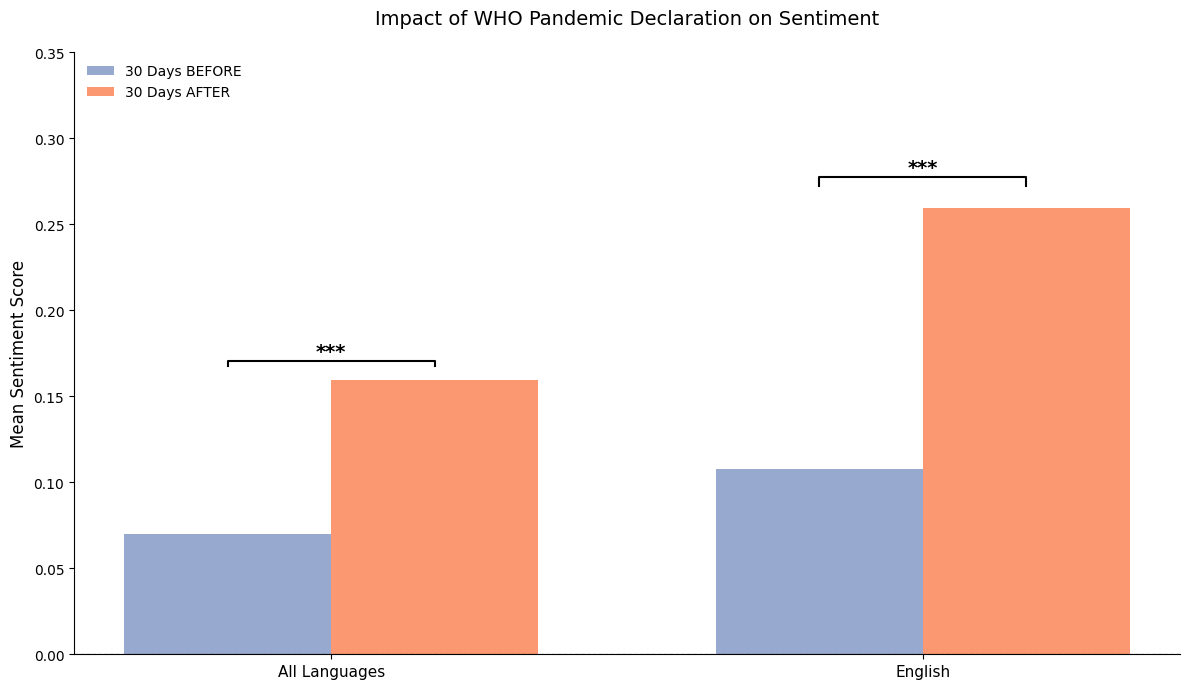

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import mannwhitneyu
row_pandemic = events[events['event_name']
                      .str.contains("declares COVID-19 a pandemic", case=False)].iloc[0]

event_date = row_pandemic['start_date']
pre_start = event_date - pd.Timedelta(days=30)
post_end = event_date + pd.Timedelta(days=30)
post_start = event_date

print(f"Подія: Pandemic Declaration ({event_date.date()})")
period_data = posts[(posts['Date'] >= pre_start) & (posts['Date'] <= post_end)].copy()
def get_who_stats(df, lang_label):
    if lang_label == "All Languages":
        subset = df
    else:
        subset = df[df['Full Language'] == lang_label]
        
    pre = subset[subset['Date'] < post_start]['sentiment_score'].dropna()
    post = subset[subset['Date'] >= post_start]['sentiment_score'].dropna()
    
    if len(pre) > 0 and len(post) > 0:
        stat, p = mannwhitneyu(pre, post, alternative='two-sided')
        return pre.mean(), post.mean(), p, True
    return 0, 0, np.nan, False
groups_list = ["All Languages", "English"]
plot_data = []

for g in groups_list:
    pre, post, p, has_data = get_who_stats(period_data, g)
    plot_data.append({
        "Group": g,
        "Pre": pre,
        "Post": post,
        "P_val": p,
        "HasData": has_data
    })


groups = [d['Group'] for d in plot_data]
pre_means = [d['Pre'] for d in plot_data]
post_means = [d['Post'] for d in plot_data]

plt.figure(figsize=(12, 7))
bar_width = 0.35
index = np.arange(len(groups))
c_pre = '#8da0cb'
c_post = '#fc8d62'

rects1 = plt.bar(index, pre_means, bar_width, label='30 Days BEFORE', color=c_pre, alpha=0.9)
rects2 = plt.bar(index + bar_width, post_means, bar_width, label='30 Days AFTER', color=c_post, alpha=0.9)
def add_annotations(rects1, rects2, data_list):
    for i, d in enumerate(data_list):
        if not d['HasData']:
            plt.text(index[i] + bar_width/2, 0.01, "Low Data", ha='center', color='red', fontsize=10)
            continue
            
        p = d['P_val']
        if p < 0.001: sig = "***"
        elif p < 0.01: sig = "**"
        elif p < 0.05: sig = "*"
        else: sig = "ns"
        
        h1 = rects1[i].get_height()
        h2 = rects2[i].get_height()
        max_h = max(h1, h2)
        
        x_center = index[i] + bar_width / 2
        bar_top = max_h + (max_h * 0.05)
        h_bracket = max_h * 0.02
        
        if sig != "ns":
            plt.plot([index[i], index[i], index[i]+bar_width, index[i]+bar_width],
                     [bar_top, bar_top+h_bracket, bar_top+h_bracket, bar_top], lw=1.5, c='k')
            plt.text(x_center, bar_top + h_bracket, sig, ha='center', va='bottom', 
                     fontsize=14, fontweight='bold')
        else:
             plt.text(x_center, max_h + 0.01, "ns", ha='center', va='bottom', 
                      fontsize=11, style='italic', color='grey')

add_annotations(rects1, rects2, plot_data)

plt.ylabel('Mean Sentiment Score', fontsize=12)
plt.title('Impact of WHO Pandemic Declaration on Sentiment', fontsize=14, pad=20)
plt.xticks(index + bar_width / 2, groups, fontsize=11)
plt.legend(loc='upper left', frameon=False)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylim(0, max(max(pre_means), max(post_means)) * 1.35)

plt.tight_layout()
plt.savefig('who_impact_fixed.png', transparent=True, dpi=300)
plt.show()

In [31]:
sentiment_map = {'negative': -1, 'neutral': 0, 'positive': 1}
posts['sentiment_score'] = posts['Sentiment'].map(sentiment_map)

pfizer_row = events[events['event_name']
                    .str.contains("Global vaccination campaigns begin", case=False)].iloc[0]
event_date = pfizer_row['start_date']
window_days = 30
pre_start = event_date - pd.Timedelta(days=window_days)
pre_end   = event_date - pd.Timedelta(days=1)
post_start = event_date
post_end   = event_date + pd.Timedelta(days=window_days)

print("Global vaccination campaigns begin event date:", event_date.date())
print(f"Pre window:  {pre_start.date()} → {pre_end.date()}")
print(f"Post window: {post_start.date()} → {post_end.date()}")

pre_all = posts[(posts['Date'] >= pre_start) & (posts['Date'] <= pre_end)]
post_all = posts[(posts['Date'] >= post_start) & (posts['Date'] <= post_end)]

pre_scores_all = pre_all['sentiment_score'].dropna()
post_scores_all = post_all['sentiment_score'].dropna()

print("\n=== H1: Vaccine announcement effect (ALL languages) ===")
print(f"N_pre = {len(pre_scores_all)}, N_post = {len(post_scores_all)}")
pre_mean_all = pre_scores_all.mean()
post_mean_all = post_scores_all.mean()
print(f"Mean sentiment pre : {pre_mean_all:.3f}")
print(f"Mean sentiment post: {post_mean_all:.3f}")
mw_stat_all, mw_p_all = mannwhitneyu(pre_scores_all,
                                     post_scores_all,
                                     alternative='two-sided')
tt_stat_all, tt_p_all = ttest_ind(pre_scores_all,
                                  post_scores_all,
                                  equal_var=False)

print(f"Mann–Whitney U p-value: {mw_p_all:.4f}")
print("=> Reject H0 (sentiment changed)"
      if mw_p_all < 0.05 else
      "=> Fail to reject H0 (no significant change)")
print(f"T-test p-value:         {tt_p_all:.4f}")

pos_share_pre_all = (pre_all['Sentiment'] == 'positive').mean()
pos_share_post_all = (post_all['Sentiment'] == 'positive').mean()
print(f"Positive share pre :  {pos_share_pre_all:.3f}")
print(f"Positive share post: {pos_share_post_all:.3f}")

pre_en = pre_all[pre_all['Language Code'] == 'en']
post_en = post_all[post_all['Language Code'] == 'en']

pre_scores_en = pre_en['sentiment_score'].dropna()
post_scores_en = post_en['sentiment_score'].dropna()

print("\n=== H1: Vaccine announcement effect (ENGLISH only) ===")
print(f"N_pre_en = {len(pre_scores_en)}, N_post_en = {len(post_scores_en)}")
pre_mean_en = pre_scores_en.mean()
post_mean_en = post_scores_en.mean()
print(f"Mean sentiment pre (en) : {pre_mean_en:.3f}")
print(f"Mean sentiment post (en): {post_mean_en:.3f}")

mw_stat_en, mw_p_en = mannwhitneyu(pre_scores_en,
                                   post_scores_en,
                                   alternative='two-sided')
tt_stat_en, tt_p_en = ttest_ind(pre_scores_en,
                                post_scores_en,
                                equal_var=False)

print(f"Mann–Whitney U p-value (en): {mw_p_en:.4f}")
print("=> Reject H0 (sentiment changed)"
      if mw_p_en < 0.05 else
      "=> Fail to reject H0 (no significant change)")
print(f"T-test p-value (en):         {tt_p_en:.4f}")

pos_share_pre_en = (pre_en['Sentiment'] == 'positive').mean()
pos_share_post_en = (post_en['Sentiment'] == 'positive').mean()
print(f"Positive share pre (en) :  {pos_share_pre_en:.3f}")
print(f"Positive share post (en): {pos_share_post_en:.3f}")

pre_ta = pre_all[pre_all['Full Language'] == 'Tamil']
post_ta = post_all[post_all['Full Language'] == 'Tamil']

pre_scores_ta = pre_ta['sentiment_score'].dropna()
post_scores_ta = post_ta['sentiment_score'].dropna()

print("\n=== H1: Vaccine announcement effect (TAMIL only) ===")
print(f"N_pre_ta = {len(pre_scores_ta)}, N_post_ta = {len(post_scores_ta)}")
pre_mean_ta = pre_scores_ta.mean()
post_mean_ta = post_scores_ta.mean()
print(f"Mean sentiment pre (ta) : {pre_mean_ta:.3f}")
print(f"Mean sentiment post (ta): {post_mean_ta:.3f}")

if len(pre_scores_ta) > 0 and len(post_scores_ta) > 0:
    mw_stat_ta, mw_p_ta = mannwhitneyu(pre_scores_ta,
                                       post_scores_ta,
                                       alternative='two-sided')
    tt_stat_ta, tt_p_ta = ttest_ind(pre_scores_ta,
                                    post_scores_ta,
                                    equal_var=False)
    print(f"Mann–Whitney U p-value (ta): {mw_p_ta:.4f}")
    print(f"T-test p-value (ta):         {tt_p_ta:.4f}")
else:
    mw_p_ta = np.nan
    print("Not enough Tamil data for statistical test.")

pos_share_pre_ta = (pre_ta['Sentiment'] == 'positive').mean() if len(pre_ta) > 0 else np.nan
pos_share_post_ta = (post_ta['Sentiment'] == 'positive').mean() if len(post_ta) > 0 else np.nan
print(f"Positive share pre (ta) :  {pos_share_pre_ta:.3f}")
print(f"Positive share post (ta): {pos_share_post_ta:.3f}")

pre_hi = pre_all[pre_all['Full Language'] == 'Hindi']
post_hi = post_all[post_all['Full Language'] == 'Hindi']

pre_scores_hi = pre_hi['sentiment_score'].dropna()
post_scores_hi = post_hi['sentiment_score'].dropna()

print("\n=== H1: Vaccine announcement effect (HINDI only) ===")
print(f"N_pre_hi = {len(pre_scores_hi)}, N_post_hi = {len(post_scores_hi)}")
pre_mean_hi = pre_scores_hi.mean()
post_mean_hi = post_scores_hi.mean()
print(f"Mean sentiment pre (hi) : {pre_mean_hi:.3f}")
print(f"Mean sentiment post (hi): {post_mean_hi:.3f}")

if len(pre_scores_hi) > 0 and len(post_scores_hi) > 0:
    mw_stat_hi, mw_p_hi = mannwhitneyu(pre_scores_hi,
                                       post_scores_hi,
                                       alternative='two-sided')
    tt_stat_hi, tt_p_hi = ttest_ind(pre_scores_hi,
                                    post_scores_hi,
                                    equal_var=False)
    print(f"Mann–Whitney U p-value (hi): {mw_p_hi:.4f}")
    print(f"T-test p-value (hi):         {tt_p_hi:.4f}")
else:
    mw_p_hi = np.nan
    print("Not enough Hindi data for statistical test.")

pos_share_pre_hi = (pre_hi['Sentiment'] == 'positive').mean() if len(pre_hi) > 0 else np.nan
pos_share_post_hi = (post_hi['Sentiment'] == 'positive').mean() if len(post_hi) > 0 else np.nan
print(f"Positive share pre (hi) :  {pos_share_pre_hi:.3f}")
print(f"Positive share post (hi): {pos_share_post_hi:.3f}")

direction_all = "increased" if post_mean_all > pre_mean_all else "decreased"
direction_en = "increased" if post_mean_en > pre_mean_en else "decreased"
direction_ta = "increased" if post_mean_ta > pre_mean_ta else "decreased"
direction_hi = "increased" if post_mean_hi > pre_mean_hi else "decreased"

print("\n=== H1 SUMMARY ===")
if mw_p_all < 0.05:
    print(f"All languages: sentiment {direction_all} after the Global vaccination campaigns begin announcement "
          f"({pre_mean_all:.3f} → {post_mean_all:.3f}, p = {mw_p_all:.4f}).")
else:
    print("All languages: no statistically significant sentiment change after Global vaccination campaigns begin.")

if mw_p_en < 0.05:
    print(f"English only: sentiment {direction_en} after the Global vaccination campaigns begin announcement "
          f"({pre_mean_en:.3f} → {post_mean_en:.3f}, p = {mw_p_en:.4f}).")
else:
    print("English only: no statistically significant sentiment change after Global vaccination campaigns begin.")

if not np.isnan(pre_mean_ta) and not np.isnan(post_mean_ta):
    if not np.isnan(mw_p_ta) and mw_p_ta < 0.05:
        print(f"Tamil only: sentiment {direction_ta} after the Global vaccination campaigns begin announcement "
              f"({pre_mean_ta:.3f} → {post_mean_ta:.3f}, p = {mw_p_ta:.4f}).")
    else:
        print("Tamil only: no statistically significant sentiment change after Global vaccination campaigns begin or insufficient data.")

if not np.isnan(pre_mean_hi) and not np.isnan(post_mean_hi):
    if not np.isnan(mw_p_hi) and mw_p_hi < 0.05:
        print(f"Hindi only: sentiment {direction_hi} after the Global vaccination campaigns begin announcement "
              f"({pre_mean_hi:.3f} → {post_mean_hi:.3f}, p = {mw_p_hi:.4f}).")
    else:
        print("Hindi only: no statistically significant sentiment change after Global vaccination campaigns begin or insufficient data.")


Global vaccination campaigns begin event date: 2021-01-01
Pre window:  2020-12-02 → 2020-12-31
Post window: 2021-01-01 → 2021-01-31

=== H1: Vaccine announcement effect (ALL languages) ===
N_pre = 7216, N_post = 6589
Mean sentiment pre : 0.193
Mean sentiment post: 0.166
Mann–Whitney U p-value: 0.0551
=> Fail to reject H0 (no significant change)
T-test p-value:         0.0289
Positive share pre :  0.372
Positive share post: 0.370

=== H1: Vaccine announcement effect (ENGLISH only) ===
N_pre_en = 5620, N_post_en = 5027
Mean sentiment pre (en) : 0.298
Mean sentiment post (en): 0.280
Mann–Whitney U p-value (en): 0.4124
=> Fail to reject H0 (no significant change)
T-test p-value (en):         0.2130
Positive share pre (en) :  0.454
Positive share post (en): 0.458

=== H1: Vaccine announcement effect (TAMIL only) ===
N_pre_ta = 212, N_post_ta = 279
Mean sentiment pre (ta) : -0.071
Mean sentiment post (ta): -0.032
Mann–Whitney U p-value (ta): 0.0613
T-test p-value (ta):         0.0702
Positiv

## People adapt to the problem and change sentiment over time

In [ ]:
posts['year'] = posts['Date'].dt.year

periods = {
    "early (2020)": posts[posts['year'] == 2020],
    "mid (2021)": posts[posts['year'] == 2021],
    "late (2022–2024)": posts[posts['year'] >= 2022]
}

neg_rates = {}
neutral_rates = {}
pos_rates = {}

for name, df in periods.items():
    neg_rates[name] = (df['Sentiment'] == 'negative').mean()
    neutral_rates[name] = (df['Sentiment'] == 'neutral').mean()
    pos_rates[name] = (df['Sentiment'] == 'positive').mean()

print("\n=== H3: Adaptation — shift from negative → neutral/positive over time ===")

print("\nNegative sentiment rates:")
for name in periods.keys():
    print(f"  {name:15s}: {float(neg_rates[name]):.3f}")

print("\nNeutral sentiment rates:")
for name in periods.keys():
    print(f"  {name:15s}: {float(neutral_rates[name]):.3f}")

print("\nPositive sentiment rates:")
for name in periods.keys():
    print(f"  {name:15s}: {float(pos_rates[name]):.3f}")
table = [
    [
        (periods["early (2020)"]['Sentiment'] == 'negative').sum(),
        (periods["early (2020)"]['Sentiment'] == 'neutral').sum(),
        (periods["early (2020)"]['Sentiment'] == 'positive').sum()
    ],
    [
        (periods["late (2022–2024)"]['Sentiment'] == 'negative').sum(),
        (periods["late (2022–2024)"]['Sentiment'] == 'neutral').sum(),
        (periods["late (2022–2024)"]['Sentiment'] == 'positive').sum()
    ]
]

chi2, p, dof, exp = chi2_contingency(table)
print(f"\nChi-square test p-value (early vs late, full sentiment structure): {p:.3e}")

if p < 0.05:
    print("\nConclusion: Reject H0 → sentiment distribution changed significantly over time.")
else:
    print("\nConclusion: Fail to reject H0 → no strong evidence sentiment structure changed.")
trend_neg = "decreased" if neg_rates["late (2022–2024)"] < neg_rates["early (2020)"] else "did not decrease"
trend_neu = "increased" if neutral_rates["late (2022–2024)"] > neutral_rates["early (2020)"] else "did not increase"
trend_pos = "increased" if pos_rates["late (2022–2024)"] > pos_rates["early (2020)"] else "did not increase"

print(f"\nTrend summary:")
print(f"  Negative sentiment {trend_neg}")
print(f"  Neutral sentiment {trend_neu}")
print(f"  Positive sentiment {trend_pos}")
print("\nInterpretation: consistent with adaptation if negative↓ and neutral/positive↑.")



=== H3: Adaptation — shift from negative → neutral/positive over time ===

Negative sentiment rates:
  early (2020)   : 0.175
  mid (2021)     : 0.171
  late (2022–2024): 0.146

Neutral sentiment rates:
  early (2020)   : 0.442
  mid (2021)     : 0.400
  late (2022–2024): 0.520

Positive sentiment rates:
  early (2020)   : 0.383
  mid (2021)     : 0.429
  late (2022–2024): 0.335

Chi-square test p-value (early vs late, full sentiment structure): 0.000e+00

Conclusion: Reject H0 → sentiment distribution changed significantly over time.

Trend summary:
  Negative sentiment decreased
  Neutral sentiment increased
  Positive sentiment did not increase

Interpretation: consistent with adaptation if negative↓ and neutral/positive↑.


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency
posts['year'] = posts['Date'].dt.year
def analyze_language_adaptation(df, lang_label, lang_column='Full Language', lang_code=None):
    print(f"\n{'='*20} {lang_label} {'='*20}")
    
    if lang_label == "All Languages":
        subset = df.copy()
    elif lang_code:
        subset = df[df['Language Code'] == lang_code].copy()
    else:
        subset = df[df[lang_column] == lang_label].copy()
        
    if len(subset) == 0:
        print("Немає даних для цієї мови.")
        return
    periods = {
        "Early (2020)": subset[subset['year'] == 2020],
        "Mid (2021)": subset[subset['year'] == 2021],
        "Late (2022-24)": subset[subset['year'] >= 2022]
    }

    neg_rates = {}
    neutral_rates = {}
    pos_rates = {}
    counts = {}

    print(f"{'Period':<15} | {'Neg':<7} | {'Neu':<7} | {'Pos':<7} | {'N_posts'}")
    print("-" * 60)

    for name, p_df in periods.items():
        n = len(p_df)
        if n > 0:
            neg = (p_df['Sentiment'] == 'negative').mean()
            neu = (p_df['Sentiment'] == 'neutral').mean()
            pos = (p_df['Sentiment'] == 'positive').mean()
            
            neg_rates[name] = neg
            neutral_rates[name] = neu
            pos_rates[name] = pos
            counts[name] = [
                (p_df['Sentiment'] == 'negative').sum(),
                (p_df['Sentiment'] == 'neutral').sum(),
                (p_df['Sentiment'] == 'positive').sum()
            ]
            print(f"{name:<15} | {neg:.3f}   | {neu:.3f}   | {pos:.3f}   | {n}")
        else:
            print(f"{name:<15} | ---     | ---     | ---     | 0")
            counts[name] = [0, 0, 0]
    if sum(counts["Early (2020)"]) > 0 and sum(counts["Late (2022-24)"]) > 0:
        table = [
            counts["Early (2020)"],
            counts["Late (2022-24)"]
        ]

        try:
            chi2, p, dof, exp = chi2_contingency(table)
            print(f"\nChi-square p-value (Early vs Late): {p:.3e}")
            if p < 0.05:
                print("=> Зміни статистично значущі.")
            else:
                print("=> Зміни НЕ є статистично значущими.")
        except ValueError:
            print("\nНеможливо провести тест (можливо, нульові частоти).")
    else:
        print("\nНедостатньо даних для порівняння періодів.")

    try:
        if neg_rates["Late (2022-24)"] < neg_rates["Early (2020)"]:
            print(f"Trend: Negative sentiment DECREASED ({neg_rates['Early (2020)']:.3f} -> {neg_rates['Late (2022-24)']:.3f})")
        else:
            print(f"Trend: Negative sentiment INCREASED or STABLE")
            
        if neutral_rates["Late (2022-24)"] > neutral_rates["Early (2020)"]:
            print(f"Trend: Neutral sentiment INCREASED ({neutral_rates['Early (2020)']:.3f} -> {neutral_rates['Late (2022-24)']:.3f})")
    except KeyError:
        pass
target_languages = [
    {"label": "All Languages", "code": None},
    {"label": "English", "code": "en"},
    {"label": "Hindi", "code": None},
    {"label": "Tamil", "code": None}
]

for lang in target_languages:
    if lang["label"] == "English":
        analyze_language_adaptation(posts, "English", lang_code="en")
    elif lang["label"] == "All Languages":
        analyze_language_adaptation(posts, "All Languages")
    else:
        analyze_language_adaptation(posts, lang["label"])


==================== All Languages ====================
Period          | Neg     | Neu     | Pos     | N_posts
------------------------------------------------------------
Early (2020)    | 0.175   | 0.442   | 0.383   | 82210
Mid (2021)      | 0.171   | 0.400   | 0.429   | 136737
Late (2022-24)  | 0.146   | 0.520   | 0.335   | 281206

Chi-square p-value (Early vs Late): 0.000e+00
=> Зміни статистично значущі.
Trend: Negative sentiment DECREASED (0.175 -> 0.146)
Trend: Neutral sentiment INCREASED (0.442 -> 0.520)

==================== English ====================
Period          | Neg     | Neu     | Pos     | N_posts
------------------------------------------------------------
Early (2020)    | 0.155   | 0.376   | 0.468   | 63806
Mid (2021)      | 0.148   | 0.332   | 0.520   | 108900
Late (2022-24)  | 0.146   | 0.361   | 0.493   | 170335

Chi-square p-value (Early vs Late): 2.686e-25
=> Зміни статистично значущі.
Trend: Negative sentiment DECREASED (0.155 -> 0.146)

=================